In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("household_power_consumption.txt", delimiter = ';')

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [26]:
df[df['Global_active_power'] == '?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21,11:23:00,?,?,?,?,?,?,NaN
6840,2006-12-21,11:24:00,?,?,?,?,?,?,NaN
19724,2006-12-30,10:08:00,?,?,?,?,?,?,NaN
19725,2006-12-30,10:09:00,?,?,?,?,?,?,NaN
41832,2007-01-14,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,2010-09-28,19:09:00,?,?,?,?,?,?,NaN
1990186,2010-09-28,19:10:00,?,?,?,?,?,?,NaN
1990187,2010-09-28,19:11:00,?,?,?,?,?,?,NaN
1990188,2010-09-28,19:12:00,?,?,?,?,?,?,NaN


In [15]:
df.count()

Date                     2075259
Time                     2075259
Global_active_power      2075259
Global_reactive_power    2075259
Voltage                  2075259
Global_intensity         2075259
Sub_metering_1           2075259
Sub_metering_2           2075259
Sub_metering_3           2049280
dtype: int64

In [30]:
df['Global_reactive_power'] = df['Global_reactive_power'].str.strip()

In [40]:
df.drop(df[df['Global_reactive_power'] == '?'].index, inplace = True)

In [45]:
df['Global_active_power'] = df['Global_active_power'].str.strip()

In [46]:
df['Voltage'] = df['Voltage'].str.strip()

In [47]:
df['Global_intensity'] = df['Global_intensity'].str.strip()

In [48]:
df['Sub_metering_1'] = df['Sub_metering_1'].str.strip()

In [49]:
df['Sub_metering_2'] = df['Sub_metering_2'].str.strip()

In [51]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      43643
Global_reactive_power    43643
Voltage                  43643
Global_intensity         43643
Sub_metering_1           43643
Sub_metering_2           43643
Sub_metering_3               0
dtype: int64

In [52]:
df.count()

Date                     2049280
Time                     2049280
Global_active_power      2005637
Global_reactive_power    2005637
Voltage                  2005637
Global_intensity         2005637
Sub_metering_1           2005637
Sub_metering_2           2005637
Sub_metering_3           2049280
dtype: int64

In [54]:
df.dropna(inplace = True)

In [55]:
df.count()

Date                     2005637
Time                     2005637
Global_active_power      2005637
Global_reactive_power    2005637
Voltage                  2005637
Global_intensity         2005637
Sub_metering_1           2005637
Sub_metering_2           2005637
Sub_metering_3           2005637
dtype: int64

In [57]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [62]:
df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']] = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']].astype(float)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005637 entries, 0 to 2031615
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 153.0+ MB


In [73]:
df['Time'] = pd.to_datetime(df['Time'])

In [69]:
x = np.array(df['Voltage'])

In [70]:
y = np.array(df['Global_intensity'])

In [71]:
np.corrcoef(x, y)

array([[ 1.        , -0.40894279],
       [-0.40894279,  1.        ]])

In [77]:
df.set_index('Date', inplace = True)

In [78]:
df_daily = df.resample('D').mean()

In [79]:
import matplotlib.pyplot as plt

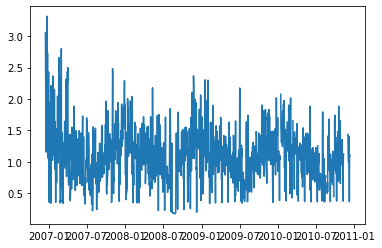

In [81]:
plt.plot(df_daily.index, df_daily.Global_active_power)